In [30]:
#Importing important librarys
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
import warnings
warnings.filterwarnings('ignore')

In [31]:
# from google.colab import drive
# drive.mount('/content/drive')

In [32]:
df1 = pd.read_csv('D:/TON IOT/Processed_datasets/Processed_datasets/Processed_Linux_dataset/linux_disk_1.csv')

In [33]:
df2 = pd.read_csv('D:/TON IOT/Processed_datasets/Processed_datasets/Processed_Linux_dataset/linux_disk_2.csv')

In [34]:
df = pd.concat([df1, df2])
df.tail(100003)

,ts,PID,RDDSK,WRDSK,WCANCL,DSK,CMD,label,type
827358,1556227788,2821,0.0,0.0,0,0.0,compiz,1,injection
827359,1556227793,3103,0.0,0.0,0,0.0,ostinato,1,injection
827360,1556227798,6451,0.0,0.0,0,0.0,atop,1,injection
827361,1556227803,6497,0.0,0.0,0,0.0,firefox,1,injection
827362,1556227808,2608,0.0,0.0,0,0.0,hud-service,1,injection
...,...,...,...,...,...,...,...,...,...
927356,1556768256,13555,0.0,0.0,0,0.0,<apache2>,0,normal
927357,1556768261,13556,0.0,0.0,0,0.0,<apache2>,0,normal
927358,1556768266,13557,0.0,0.0,0,0.0,<apache2>,0,normal
927359,1556768271,13486,0.0,0.0,0,0.0,<apache2>,0,normal


In [35]:
df.isnull().sum().sum()

0

# **Pre-Processing**

In [36]:
#dropping unnecessary columns
df = df.drop(['ts', 'type' ], axis = 1)
df.shape


(1927361, 7)

In [37]:
import pandas as pd 
pd.set_option('max_rows', 299999)
pd.set_option('max_colwidth', 20000)
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

OptionError: Pattern matched multiple keys

# **Processing the dataset**

In [38]:
df['CMD'] = le.fit_transform(df['CMD'])

df['RDDSK'] = (df['RDDSK'].replace(r'[KMB]+$', '', regex=True).astype(float) * df['RDDSK'].str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B', ' '], [10**3, 10**6, 10**9, '']).astype(int))

df['WRDSK'] = (df['WRDSK'].replace([r'[KMB]+$', ' ', '-'], ['', '' ,'0'], regex=True).astype(float) * df['WRDSK'].str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B'], [10**3, 10**6, 10**9]).astype(int))

df['WCANCL'].replace( ['2%','5%','1%','6%', '3%','4%' ] ,[ '0.002','0.005', '0.001','0.006', '0.003','0.004' ], inplace= True)
df['WCANCL'] = (df['WCANCL'].replace(r'[KMB]+$' , '', regex=True).astype(float) * df['WCANCL'].str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B'], [10**3, 10**6, 10**9]).astype(int))

df['DSK'].replace( ['worer/u256:0', 'atop', 'dhclient', 'apache2','<apache2>', '<dhclient>' ] ,[ '0','0', '0','0', '0','0' ], inplace= True)
df['DSK'].replace('%', '', regex=True, inplace=True)
df['DSK'] = df['DSK'].astype(float)

In [39]:
df['DSK'].replace([8.0, 5.0, 4.0, 2.0, 26.0, 12.0, 6.0, 29.0, 19.0, 52.0, 11.0, 3.0, 87.0, 66.0, 79.0, 9.0, 13.0, 82.0, 91.0, 93.0, 62.0, 7.0, 88.0, 48.0, 81.0, 84.0, 94.0, 90.0, 92.0, 86.0, 95.0, 96.0, 75.0, 16.0, 54.0, 18.0, 17.0, 25.0, 47.0, 20.0, 60.0, 74.0, 10.0, 24.0, 37.0, 33.0, 23.0, 44.0, 15.0, 43.0, 28.0, 61.0, 59.0, 89.0, 40.0, 21.0, 22.0, 69.0, 97.0, 70.0, 63.0, 83.0, 58.0, 41.0, 45.0, 27.0, 14.0, 78.0, 77.0, 71.0, 39.0, 56.0, 32.0, 98.0, 76.0, 42.0, 57.0, 80.0, 51.0, 73.0, 30.0, 31.0, 50.0, 68.0, 38.0, 46.0, 53.0, 49.0, 72.0, 35.0, 34.0, 36.0, 55.0, 99.0, 67.0, 65.0, 100.0, 85.0, 64.0], [0.08, 0.05, 0.04, 0.02,0.26, 0.12, 0.06, 0.29, 0.19, 0.52, 0.11, 0.03, 0.87, 0.66, 0.79, 0.09, 0.13, 0.82, 0.91, 0.93, 0.62, 0.07, 0.88, 0.48, 0.81, 0.84, 0.94, 0.90, 0.92, 0.86, 0.95, 0.96, 0.75, 0.16, 0.54, 0.18, 0.17, 0.25, 0.47, 0.20, 0.60, 0.74, 0.10, 0.24, 0.37, 0.33, 0.23, 0.44, 0.15, 0.43, 0.28, 0.61, 0.59, 0.89, 0.40, 0.21, 0.22, 0.69, 0.97, 0.70, 0.63, 0.83, 0.58, 0.41, 0.45, 0.27, 0.14, 0.78, 0.77, 0.71, 0.39, 0.56, 0.32, 0.98, 0.76, 0.42, 0.57, 0.80, 0.51, 0.73, 0.30, 0.31, 0.50, 0.68, 0.38, 0.46, 0.53, 0.49, 0.72, 0.35, 0.34, 0.36, 0.55, 0.99, 0.67, 0.65, 1.00, 0.85, 0.64], regex=True, inplace=True)


In [40]:
df.dtypes

PID         int64
RDDSK     float64
WRDSK     float64
WCANCL    float64
DSK       float64
CMD         int32
label       int64
dtype: object

# **Done Pre-Processing**

In [41]:
cor= df.corr()
cor


,PID,RDDSK,WRDSK,WCANCL,DSK,CMD,label
PID,1.000000,-0.001142,-0.000108,-0.000586,-0.036870,-0.260500,-0.047692
RDDSK,-0.001142,1.000000,0.109378,0.062897,0.013842,-0.000072,-0.000447
WRDSK,-0.000108,0.109378,1.000000,0.021737,0.018047,-0.001254,0.003877
WCANCL,-0.000586,0.062897,0.021737,1.000000,0.001406,0.001143,-0.000063
DSK,-0.036870,0.013842,0.018047,0.001406,1.000000,0.057215,-0.003640
CMD,-0.260500,-0.000072,-0.001254,0.001143,0.057215,1.000000,-0.001754
label,-0.047692,-0.000447,0.003877,-0.000063,-0.003640,-0.001754,1.000000


<AxesSubplot: >

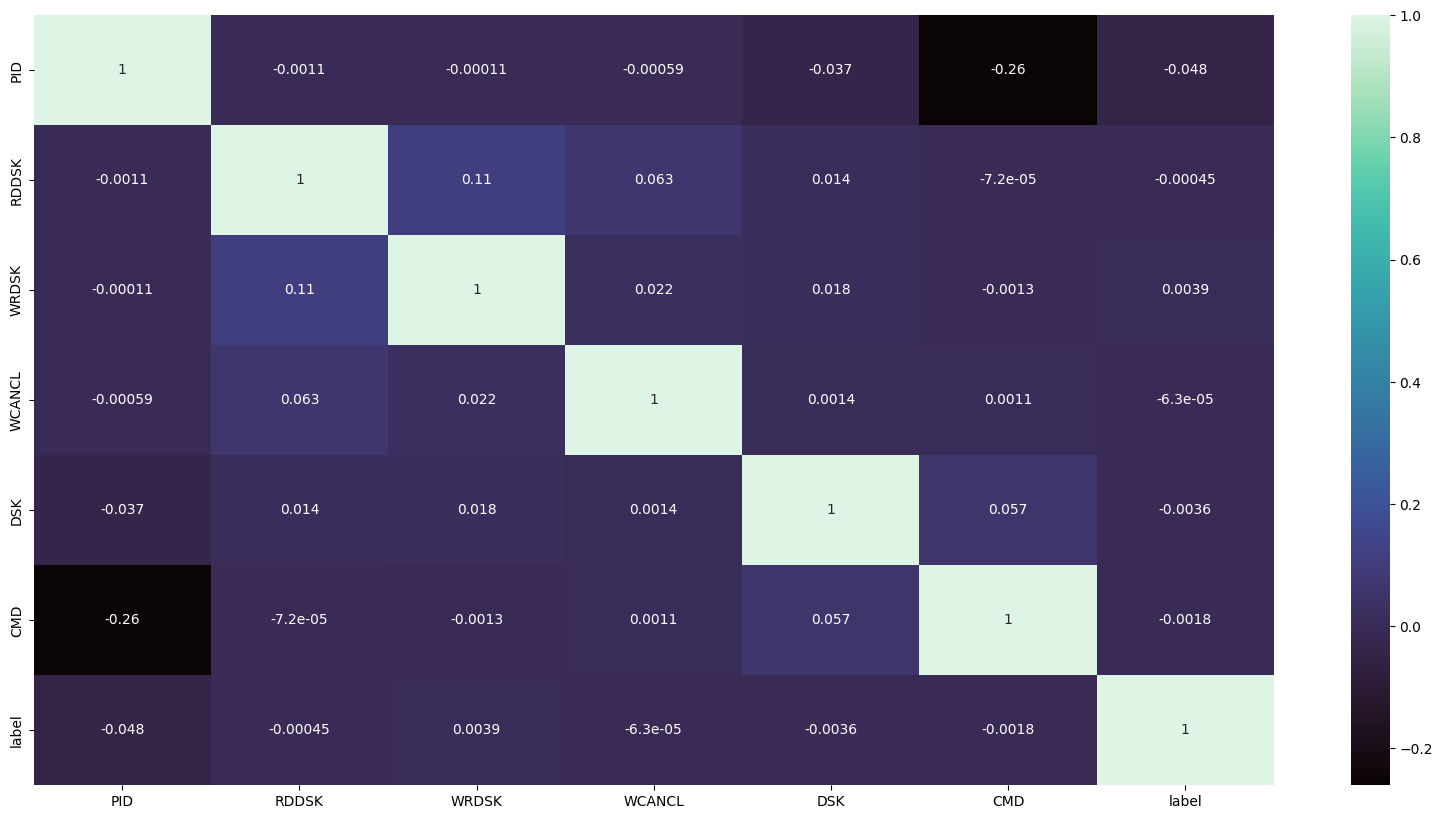

In [42]:
plt.figure(figsize=(20, 10))
sns.heatmap(data=cor, annot = True, cmap='mako')

In [43]:
# import matplotlib.pyplot as plt
# columns = df.columns
# for col in columns:
#     print("col: ", col)
#     df[col].hist()
#     plt.show()

# **Train Test Split**

In [44]:
#from sklearn.model_selection import train_test_split
#X=df[['PID','TRUN','TSLPI','TSLPU','POLI','NICE','PRI','CPUNR','Status','EXC','State','CPU','CMD']]
#y=df[['label' ]]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
#X.shape , y.shape

In [45]:
x=df[['PID','RDDSK',	'WRDSK'	,'WCANCL',	'DSK'	,'CMD']]
y=df['label' ]

# **Logistic Regression**

In [46]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=8, shuffle = True, random_state=3)

In [47]:
for train_index, test_index in skf.split(x, y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    
lr = LogisticRegression(class_weight="balanced")
lr.fit(x_train, y_train) #Training the model
y_pred_lr = lr.predict(x_test)
print(y_pred_lr)# printing predictions


#Accuracy Score

from sklearn.metrics import accuracy_score
lrAccuracy = round(accuracy_score(y_test, y_pred_lr)*100,2)
print("Accuracy of LR: ",lrAccuracy)

#F1 Score

from sklearn.metrics import f1_score
lrF1 = round(f1_score(y_test, y_pred_lr)*100,2)
print("f1_score of LR: ",lrF1)

#AUC Score

from sklearn.metrics import roc_auc_score
lrAuc = round(roc_auc_score (y_test, y_pred_lr)*100,2)
print('AUC Score of LR:',lrAuc)

[1 1 0 ... 0 1 0]
Accuracy of LR:  50.46
f1_score of LR:  27.58
AUC Score of LR: 53.25


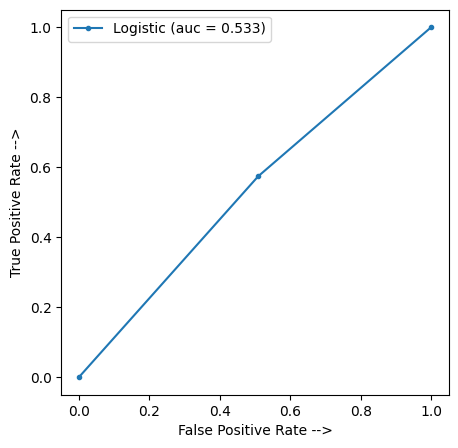

In [48]:
#ROC CURVE:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_lr)
auc_logistic = auc(logistic_fpr, logistic_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

<AxesSubplot: >

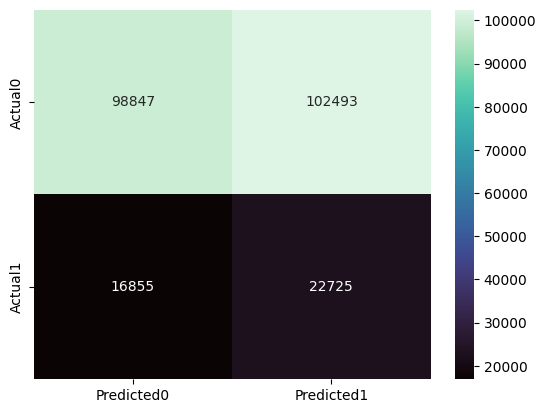

In [49]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot(y_true, y_pred):
    labels = unique_labels(y_test)
    column = [f'Predicted{label}' for label in labels]
    indices = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns = column, index=indices)
    return sns.heatmap(table, annot = True, fmt = 'd', cmap = 'mako' )

plot(y_test, y_pred_lr)

# **Oversampling**

In [50]:
from imblearn.over_sampling import SMOTE
import numpy as np
#Seeing the value count before oversampling
unique, count = np.unique(y_train, return_counts = True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique, count)}
print("Before oversampling",y_train_dict_value_count)

sm = SMOTE(random_state=12)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

# Seeing the value count after oversampling
unique, count = np.unique(y_train_sm, return_counts = True)
y_train_smote_value_count = {k:v for (k,v) in zip(unique, count)}
print("After oversampling",y_train_smote_value_count)

Before oversampling {0: 1409384, 1: 277057}
After oversampling {0: 1409384, 1: 1409384}


In [51]:
for train_index, test_index in skf.split(x_train_sm, y_train_sm):
    x_train, x_test, y_train, y_test = x_train_sm.iloc[train_index], x_train_sm.iloc[test_index], y_train_sm.iloc[train_index], y_train_sm.iloc[test_index]

lr = LogisticRegression(class_weight="balanced")
lr.fit(x_train, y_train) #Training the model
y_pred_lr = lr.predict(x_test)
print(y_pred_lr)# printing predictions


#Accuracy Score

from sklearn.metrics import accuracy_score
ovr_lrAccuracy = round(accuracy_score(y_test, y_pred_lr)*100,2)
print("Accuracy of lr after oversampling:",ovr_lrAccuracy)

#F1 Score

from sklearn.metrics import f1_score
ovr_lrF1 = round(f1_score(y_test, y_pred_lr)*100,2)
print("f1_score of lr after oversampling:",ovr_lrF1)

#AUC Score

from sklearn.metrics import roc_auc_score
ovr_lrAuc = round(roc_auc_score (y_test, y_pred_lr)*100,2)
print('AUC Score of lr after oversampling:', ovr_lrAuc)

[1 1 0 ... 1 1 0]
Accuracy of lr after oversampling: 53.63
f1_score of lr after oversampling: 55.65
AUC Score of lr after oversampling: 53.63


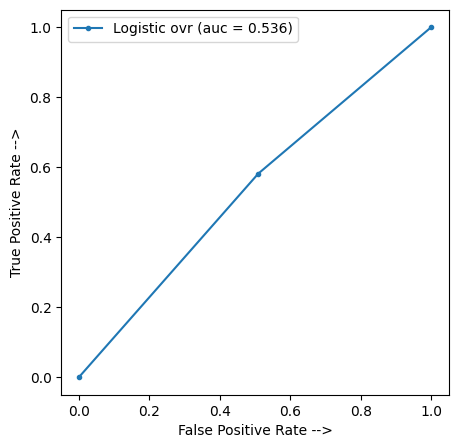

In [52]:
#ROC CURVE:
from sklearn.metrics import roc_curve, auc, confusion_matrix

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_lr)
auc_logistic = auc(logistic_fpr, logistic_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic ovr (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()


<AxesSubplot: >

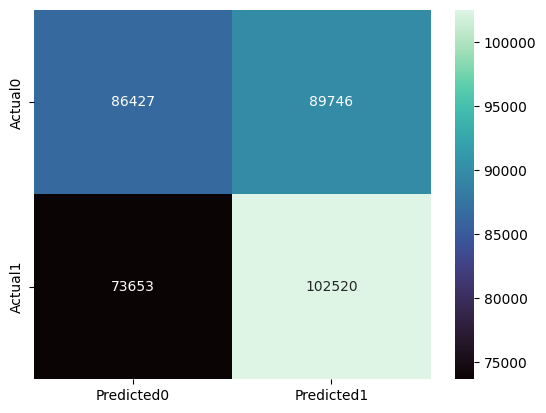

In [53]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot(y_true, y_pred):
    labels = unique_labels(y_test)
    column = [f'Predicted{label}' for label in labels]
    indices = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns = column, index=indices)
    return sns.heatmap(table, annot = True, fmt = 'd', cmap = 'mako' )

plot(y_test, y_pred_lr)

# Result when we use undersampling on the data

In [54]:
x=df[['PID','RDDSK',	'WRDSK'	,'WCANCL',	'DSK'	,'CMD']]
y=df['label']

In [55]:
for train_index, test_index in skf.split(x, y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

from imblearn.under_sampling import RandomUnderSampler
import numpy as np
from collections import Counter

#Seeing the value count before oversampling
print("Before undersampling", Counter(y_train))

rus = RandomUnderSampler(random_state=12)
x_unsampled, y_unsampled = rus.fit_resample(x_train, y_train)

# Seeing the value count after oversampling
print("After undersampling",Counter(y_unsampled))

Before undersampling Counter({0: 1409384, 1: 277057})
After undersampling Counter({0: 277057, 1: 277057})


In [56]:
# --------------------------Logistic Reg -----------------------------------

for train_index, test_index in skf.split(x_unsampled, y_unsampled):
    x_train, x_test, y_train, y_test = x_unsampled.iloc[train_index], x_unsampled.iloc[test_index], y_unsampled.iloc[train_index], y_unsampled.iloc[test_index]

lr = LogisticRegression(class_weight="balanced")
lr.fit(x_train, y_train) #Training the model
y_pred_lr = lr.predict(x_test)
print(y_pred_lr)# printing predictions


#Accuracy Score

from sklearn.metrics import accuracy_score
und_lrAccuracy = round(accuracy_score(y_test, y_pred_lr)*100,2)
print("Accuracy of lr undersampled : ",und_lrAccuracy)

#F1 Score

from sklearn.metrics import f1_score
und_lrF1 = round(f1_score(y_test, y_pred_lr)*100,2)
print("f1_score of lr undersampled: ",und_lrF1)

#AUC Score

from sklearn.metrics import roc_auc_score
try:
  und_lrAuc = round(roc_auc_score (y_test, y_pred_lr)*100,2)
  print('AUC Score of lr undersampled:', und_lrAuc)
except ValueError:
    pass

[0 0 1 ... 0 1 1]
Accuracy of lr undersampled :  53.73
f1_score of lr undersampled:  55.88
AUC Score of lr undersampled: 53.73


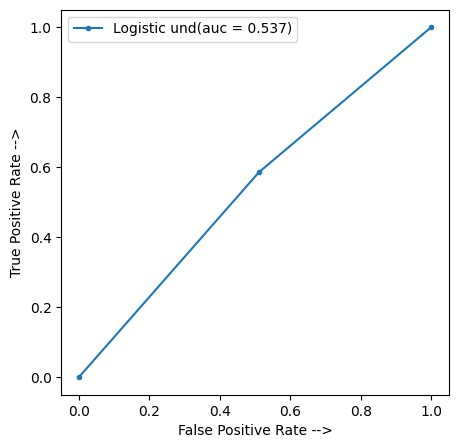

In [57]:
from sklearn.metrics import roc_curve, auc, confusion_matrix

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_lr)
auc_logistic = auc(logistic_fpr, logistic_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic und(auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

<AxesSubplot: >

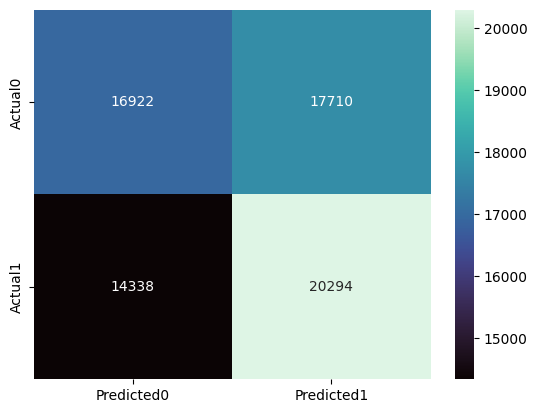

In [58]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot(y_true, y_pred):
    labels = unique_labels(y_test)
    column = [f'Predicted{label}' for label in labels]
    indices = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns = column, index=indices)
    return sns.heatmap(table, annot = True, fmt = 'd', cmap = 'mako' )

plot(y_test, y_pred_lr)

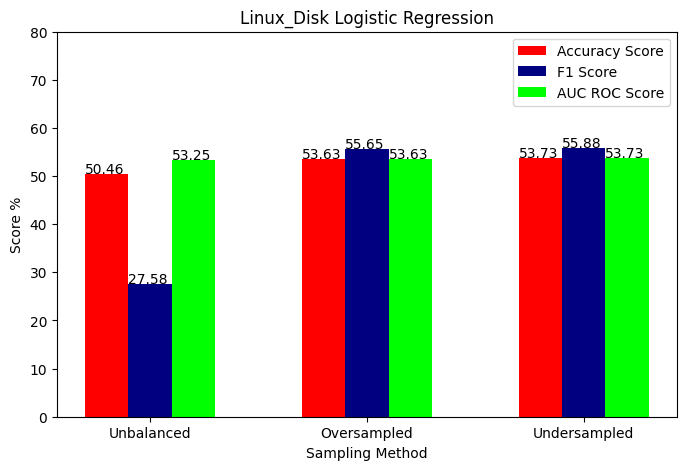

In [59]:
#Plotting a bar graph to compare the accuracy scores of the different scoring metrics
all_accuracy_scores = [lrAccuracy, ovr_lrAccuracy, und_lrAccuracy]
all_f1_scores = [lrF1, ovr_lrF1, und_lrF1]
all_auc_roc_scores = [lrAuc, ovr_lrAuc, und_lrAuc]

x_labels = ['Unbalanced', 'Oversampled', 'Undersampled']

def autolabel(rectangle_group):
    for rect in rectangle_group:
        height = rect.get_height()

        ax.annotate(str(height), xy = (rect.get_x(), height+.15))

width = 0.2

x_all_accuracy_score = [x-width for x in range (len(all_accuracy_scores))]
x_all_f1_score = [x for x in range (len(all_f1_scores))]
x_all_auc_roc_score = [x+width for x in range (len(all_auc_roc_scores))]

fig,ax = plt.subplots(figsize = (8, 5))
rect1 = ax.bar(x_all_accuracy_score ,all_accuracy_scores, width, label='Accuracy Score', color = 'red')
rect2 = ax.bar(x_all_f1_score, all_f1_scores, width, label='F1 Score', color='navy')
rect3 = ax.bar(x_all_auc_roc_score, all_auc_roc_scores, width, label='AUC ROC Score', color='lime')
plt.xticks([x for x in range(len(x_labels))], x_labels)
ax.set_title('Linux_Disk Logistic Regression')
ax.set_xlabel('Sampling Method')
ax.set_ylabel('Score %')
plt.ylim([0, 80])
ax.legend()

autolabel(rect1)
autolabel(rect2)
autolabel(rect3)
plt.show()

# **Decision Tree**

In [60]:
# t1 = time.perf_counter()
# conduct = DecisionTreeClassifier(criterion='entropy',random_state=20)
# conduct.fit(X_train, y_train)
# y_pred_dt = conduct.predict(X_test)
# DecisionTreeAccuracy = accuracy_score(y_pred_dt,y_test)
# print("Accuracy of Decision Tree : ",DecisionTreeAccuracy*100,'%') #Decision Tree Accuracy

# t2 = time.perf_counter()
# Decisiontreetime= t2-t1
# print('time taken to run:',Decisiontreetime) #time

# **SVC**(doesnt work)

In [61]:
# from sklearn import svm
# svc = svm(kernel="linear")
# svc.fit(X_train, y_train)
# accuracy_train_04=svc.score(X_train, y_train)
# accuracy_test_04=svc.score(X_test, y_test)
# print("Accuracy of SVC  : ", accuracy_test_04*100,'%' ) #SVC Accuracy

# **Linear Regression**

In [62]:
# #LinearRegression 
# from sklearn.linear_model import LinearRegression
# t1 = time.perf_counter()
# regressor = LinearRegression()

# regressor.fit(X_train,y_train)
# y_pred_linear = regressor.predict(X_test)
# LinearRegression  = regressor.score(X_test, y_test)
# print("Accuracy of Linear Regression  : ", LinearRegression*100,'%' ) #Linear Regression Accuracy 

# t2 = time.perf_counter()
# LinearRegtime= t2-t1
# print('time taken to run:',LinearRegtime) #time

# **Random Forest Classifier**

In [63]:
# from sklearn.ensemble import RandomForestClassifier
# t1 = time.perf_counter()
# rfc = RandomForestClassifier(n_estimators=50)
# rfc.fit(X_train, y_train)
# y_pred_rfc = rfc.predict(X_test)
# rfc.score(X_test,y_test)
# accuracy_train_05=rfc.score(X_train, y_train)
# accuracy_test_05=rfc.score(X_test, y_test)
# print("Accuracy of Random Forest Classifier  : ", accuracy_test_05*100,'%' ) #Random Forest Classifier Accuracy

# t2 = time.perf_counter()
# RandomForesttime= t2-t1
# print('time taken to run:',RandomForesttime) #time

# **Neural Network Classifier**

In [64]:
# from sklearn.neural_network import MLPClassifier
# t1 = time.perf_counter()
# nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)

# nnc.fit(X_train, y_train)
# y_pred_nnc = nnc.predict(X_test)
# accuracy_train_03=nnc.score(X_train, y_train)
# accuracy_test_03=nnc.score(X_test, y_test)
# print("Accuracy of Neural Network Classifier  : ", accuracy_test_03*100,'%' ) #Neural Network Classifier Accuracy

# t2 = time.perf_counter()
# NNCtime= t2-t1
# print('time taken to run:',NNCtime) #time

# **Naive Bayes Classifier**

In [65]:
# from sklearn.naive_bayes import GaussianNB
# t1 = time.perf_counter()
# gnb = GaussianNB()
# nb= gnb.fit(X_train, y_train)
# y_pred_nb = nb.predict(X_test)

# accuracy_nb=gnb.score(X_train, y_train)
# accuracy_nb=gnb.score(X_test, y_test)
# print("Accuracy of naive bayes Classifier  : ", accuracy_nb*100,'%' ) #Neural Network Classifier Accuracy

# t2 = time.perf_counter()
# NBtime= t2-t1
# print('time taken to run:',NBtime) #time

# **Plot ROC and Compare AUC**

In [66]:
# from sklearn.metrics import roc_curve, auc

# logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
# auc_logistic = auc(logistic_fpr, logistic_tpr)

# nnc_fpr, nnc_tpr, threshold = roc_curve(y_test, y_pred_nnc)
# auc_nnc = auc(nnc_fpr, nnc_tpr)

# rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, y_pred_rfc)
# auc_rfc = auc(rfc_fpr, rfc_tpr)

# regressor_fpr, regressor_tpr, threshold = roc_curve(y_test, y_pred_linear)
# auc_regressor = auc(regressor_fpr, regressor_tpr)

# conduct_fpr, conduct_tpr, threshold = roc_curve(y_test, y_pred_dt)
# auc_conduct = auc(conduct_fpr, conduct_tpr)

# gnb_fpr, gnb_tpr, threshold = roc_curve(y_test, y_pred_nb)
# auc_gnb = auc(gnb_fpr, gnb_tpr)

# plt.figure(figsize=(5, 5), dpi=100)
# plt.plot(nnc_fpr, nnc_tpr, linestyle='-', label='NNC (auc = %0.3f)' % auc_nnc)
# plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
# plt.plot(rfc_fpr, rfc_tpr, linestyle='-', label='RFC (auc = %0.3f)' % auc_rfc)
# plt.plot(regressor_fpr, regressor_tpr, linestyle='-', label='Linear (auc = %0.3f)' % auc_regressor)
# plt.plot(conduct_fpr, conduct_tpr, linestyle='-', label='DT (auc = %0.3f)' % auc_conduct)
# plt.plot(gnb_fpr, gnb_tpr, linestyle='-', label='Naive Bayes (auc = %0.3f)' % auc_gnb)

# plt.xlabel('False Positive Rate -->')
# plt.ylabel('True Positive Rate -->')

# plt.legend()

# plt.show()

In [67]:
import shap

In [68]:
# import shap
# # explain the model's predictions using SHAP
# # (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
# explainer = shap.Explainer(rfc)
# shap_values = explainer(X)

# # visualize the first prediction's explanation
# shap.plots.waterfall(shap_values[0])

In [69]:
# # visualize the first prediction's explanation with a force plot
# shap.plots.force(shap_values[0])

In [70]:
# # summarize the effects of all the features
# shap.plots.beeswarm(shap_values)

In [71]:
# shap.plots.bar(shap_values)

# **Lime**

In [72]:
# !pip install lime

In [73]:
# import lime
# from lime import lime_tabular
# interpretor = lime_tabular.LimeTabularExplainer(
#     training_data=np.array(X_train),
#     feature_names=X_train.columns,
#     mode='classification'
# )
# # explainer = lime_tabular.LimeTabularExplainer (training_data = np.array(X.train), mode= "regression", feature_names = X_train.columns, categorical_features = [0])



In [74]:
# X_test.iloc[4]

In [75]:
# exp = interpretor.explain_instance(
#     data_row=X_test.iloc[4], ##new data/test data
#     predict_fn=gnb.predict_proba
# )

# exp.show_in_notebook(show_table = True)

In [76]:
# exp.as_list()

# **Comparing**

In [77]:
# fig, ax = plt.subplots()
# names = ['LinearRegre', 'NeuralNetwork','LogisticRegre','DecisionTree', 'RandomForest' ]
# plt.tight_layout()
# plt.subplots_adjust(wspace = 1, hspace = 1)
# acc =[ LinearRegression*100, accuracy_test_03*100,  LogisticRegressionAccuracy*100, DecisionTreeAccuracy*100, accuracy_test_05*100  ]
# position = [1,2,3,4,5]
# ax.bar(position,acc, width=0.5, color="red", bottom=None, align='center')
# plt.xticks(position,names )
# plt.subplots_adjust(wspace = 1, hspace = 1)
# ax.set_title('Accuracy Comparision of Logistic Regression,  Decision Tree, Linear Regression, Random Forest and NNC')
# ax.set_xlabel('Classification')
# ax.set_ylabel('Accuracy %')

In [78]:
# fig, ax = plt.subplots()
# names = ['LinearRegre', 'NeuralNetwork','LogisticRegre','DecisionTree', 'RandomForest' ]
# plt.tight_layout()
# plt.subplots_adjust(wspace = 1, hspace = 1)
# acc =[ LinearRegtime, NNCtime,  LogisticRegtime, Decisiontreetime, RandomForesttime]
# position = [1,2,3,4,5]
# ax.bar(position,acc, width=0.5, color="red", bottom=None, align='center')
# plt.xticks(position,names )
# plt.subplots_adjust(wspace = 1, hspace = 1)
# ax.set_title('Execution time Comparision of Logistic Regression,  Decision Tree, Linear Regression, Random Forest and NNC')
# ax.set_xlabel('Classification')
# ax.set_ylabel('Time (seconds)')

# **SVC** (doesnt work)